In [1]:
if __name__=="__main__":
	import sys
	sys.path.append('/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/Scripts')

In [2]:
import numpy as np
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import tifffile as tiff
from src.SMT_Analysis_BP.helpers.Analysis_functions import *
from src.SMT_Analysis_BP.helpers.blob_detection import *
from skimage import io
#import curve_fit 
from scipy.optimize import curve_fit
import src.SMT_Analysis_BP.helpers.fbm_utility as fbm_utility
import src.SMT_Analysis_BP.helpers.simulate_foci as simulate_foci
import src.SMT_Analysis_BP.helpers.simulate_cells as simulate_cells
import src.SMT_Analysis_BP.helpers.SMT_converters as smt
import src.SMT_Analysis_BP.helpers.smallestenclosingcircle as smallestenclosingcircle
#import convexhull
from scipy.spatial import ConvexHull
from sklearn.cluster import DBSCAN
import pickle

In [30]:
initial_dict = {
    "initial_centers":np.array([[30,15]]),
    "initial_scale": np.array([2.]),
    "diffusion_coefficient": np.array([0]),
    "hurst_exponent": np.array([0.5])  
}
cell_parms = {
    "diffusion_coefficients":np.array(list(0.09*np.ones(1000))),
    "initials": initial_dict,
    "num_tracks":1000,
    "track_type":"fbm",
    "hursts":np.array(list(0.2*np.ones(1000))),
    "dims":(60,60),
    "movie_frames":500,
    "cell_space":np.array([10,50,10,22])
}     
global_sim_params = {
    "track_length_mean":7,
    "track_distribution":"exponential",
    "exposure_time":20,#ms same as frame_time
    "base_noise":140,
    "point_intensity":20,
    "psf_sigma":1.,
    "frame_time":20,#ms
    "pixel_size":130,
    "axial_function":"exponential",
    "density_dif": 5
}

In [31]:
cell_sim = simulate_cells.Simulate_cells(cell_parms,global_sim_params)
a_sim = cell_sim.get_cell()

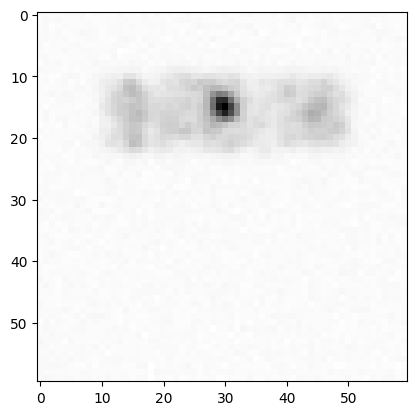

In [32]:
plt.imshow(np.sum(a_sim["map"],axis=0),cmap="Greys")